# FAST SORTING IN NUMPY

np.sort uses a quicksort algorithm, though mergesrot and heapsort are also available. The default quicksort is more than sufficient for most applications.

In [1]:
import numpy as np

In [2]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [3]:
# for sorting the arrays in-place
x.sort()
print(x)

[1 2 3 4 5]


In [4]:
# argsort returns the indices of the sorted elements
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [5]:
# using fancy indexing
x[i]

array([1, 2, 3, 4, 5])

## SORTING ALONG ROWS OR COLUMNS

we can use "axis" argument

In [6]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [7]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [8]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

This treats each row or column as an independent array, and any relationships between the row or column values will be lost

# PARTIAL SORTS: PARTITIONING

Want to find *k* smallest values in the array<br>
np.partition

In [12]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

the first three values in the resulting array are the three smallest in the array.<br>
remaining positions contain the remaining values<br>
within the two partitions, the elements have arbitrary order

we can pratition along arbitrary axis of a multidimensional array

In [13]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

The result is an array where the first two slots in each row contain the smallest values from that row

# EXAMPLE: K-NEAREST NEIGHBORS

In [14]:
X = rand.rand(10, 2)

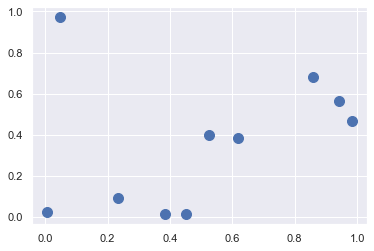

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;
seaborn.set()

plt.scatter(X[:, 0], X[:, 1], s=100);

Compute the distance between each pair of points.<br>
Use the efficient broadcasting, and aggregation

In [16]:
dist_sq = np.sum( (X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [17]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [18]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [19]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [20]:
# diagonal of the resulting matrix should be all zero
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Use np.argsort to sort along each row<br>
The leftmost columns will then give the indices of the nearest neigbors

In [21]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


First column gives the numbers 0 through 9 in order<br>
This is due to the fact that each point's neighbor is itself